In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(x_train,_),(x_test,_)=mnist.load_data()
x_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
x_train_scaled=x_train.astype('float32')/255.
x_test_scaled=x_test.astype('float32')/255.
x_train_scaled=np.reshape(x_train_scaled,(len(x_train_scaled),28,28,1))
x_test_scaled=np.reshape(x_test_scaled,(len(x_test_scaled),28,28,1))

In [4]:
noise_factor=0.5
x_train_noisy=x_train_scaled+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train_scaled.shape)
x_test_noisy=x_test_scaled+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test_scaled.shape)

In [5]:
x_train_noisy=np.clip(x_train_noisy,0.,1.)
x_test_noisy=np.clip(x_test_noisy,0.,1.)

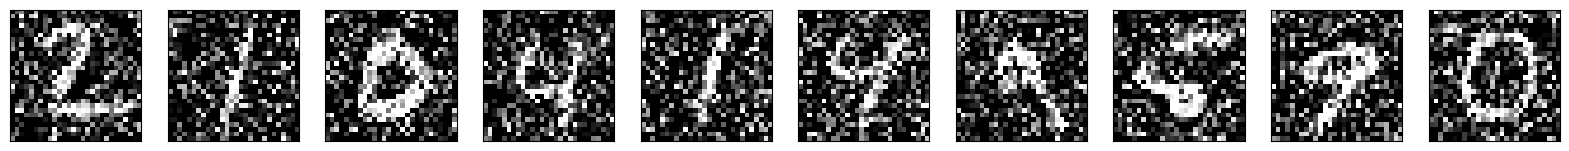

In [6]:
n=10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax=plt.subplot(1,n,i)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
input_img = keras.Input(shape=(28, 28, 1))


In [8]:
x=layers.Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(6,(7,7),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [9]:
x=layers.Conv2D(8,(3,3),activation='relu',padding='same')(encoded)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(6,(7,7),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(16,(3,3),activation='relu')(x)
x=layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [10]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 6)         4710      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 6)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           440   

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/2
469/469 [==============================] - 110s 232ms/step - loss: 0.2572 - val_loss: 0.1771
Epoch 2/2
469/469 [==============================] - 100s 212ms/step - loss: 0.1677 - val_loss: 0.1607


DEVADARSHAN A S
 212222110007


<Axes: >

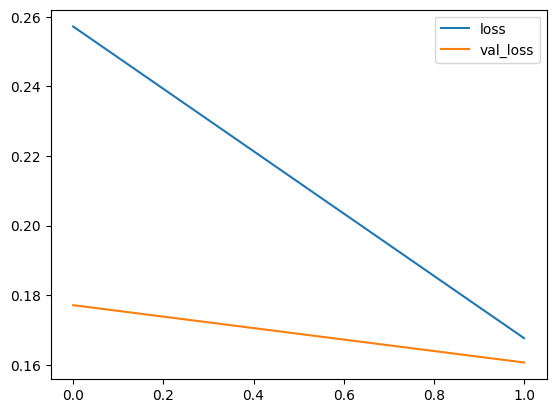

In [12]:
print("DEVADARSHAN A S\n 212222110007")
metrics = pd.DataFrame(autoencoder.history.history)
metrics[['loss','val_loss']].plot()

313/313 [==============================] - 8s 24ms/step
DEVADARSHAN A S
 212222110007


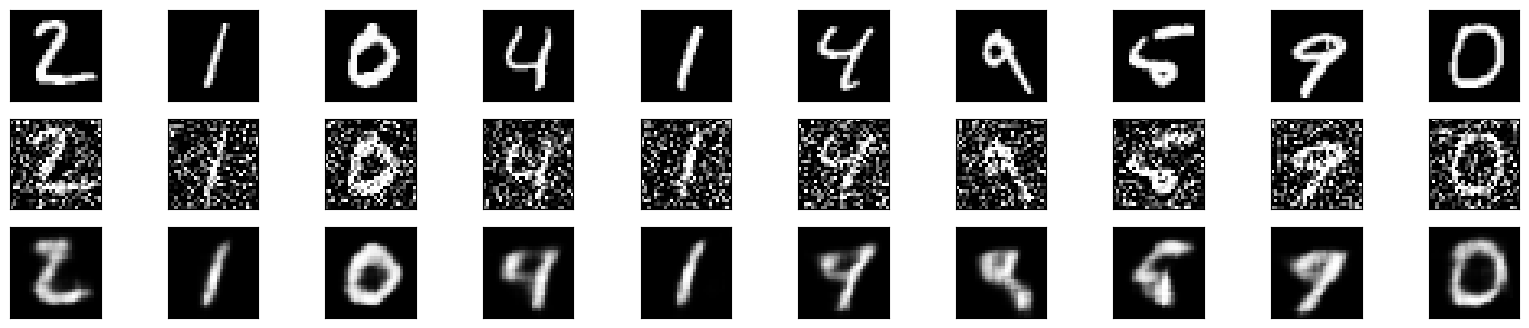

In [13]:

decoded_imgs = autoencoder.predict(x_test_noisy)

print("DEVADARSHAN A S\n 212222110007")
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()